![title](sensitivity.png)


In [29]:
import numpy as np
import matplotlib.pyplot as plt

Ra=6.0
Rb=6.0
R1=4e3
R2=1.6e3
R3=4e3
Rs=100e-6
I=10

In [33]:
def funckU(I,Rs,Ra,Rb,R1,R2,R3):
    Rx=Rs
    Ry=Ra+R1+R2+R3+Rb
    I1=I/(1+Rx/Ry)
    I2=I1*Rx/Ry
    kU=I2*R2
    return kU,I1,I2

In [34]:
kU,I1,I2=funckU(I=I,Rs=Rs,Ra=Ra,Rb=Rb,R1=R1,R2=R2,R3=R3)
print(kU)

0.00016645859169310662


In [41]:
# Select 1000 points
Npoint=1000

# Arrays to store the data 
kU_arr=np.zeros(Npoint)
I1_arr=np.zeros(Npoint)
I2_arr=np.zeros(Npoint)
Rb_arr=np.zeros(Npoint)

# Rb nominal
kU,I1,I2=funckU(I=I,Rs=Rs,Ra=Ra,Rb=Rb,R1=R1,R2=R2,R3=R3)

# vary the Rb 
k=0
Rbarray=np.linspace(Ra*0.01,Ra*100,Npoint)
for Rb_point in Rbarray:
    kU_arr[k],I1_arr[k],I2_arr[k]=funckU(I=I,Rs=Rs,Ra=Ra,Rb=Rb_point,R1=R1,R2=R2,R3=R3)
    Rb_arr[k]=Rb_point
    k+=1

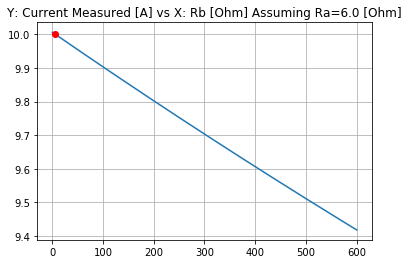

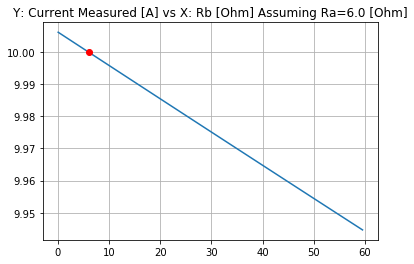

In [44]:
# Normalize Current Output and Plot  
k=1/kU*I

plt.figure()
plt.title("Y: Current Measured [A] vs X: Rb [Ohm] Assuming Ra="+str(Ra)+" [Ohm]")
plt.plot(Rb_arr,kU_arr*k)
plt.plot(Ra,kU*k,'ro')
plt.grid()
plt.show()

plt.figure()
plt.title("Y: Current Measured [A] vs X: Rb [Ohm] Assuming Ra="+str(Ra)+" [Ohm]")
plt.plot(Rb_arr[0:100],kU_arr[0:100]*k)
plt.plot(Ra,kU*k,'ro')
plt.grid()
plt.show()
